In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, spearmanr, kruskal
import seaborn as sbs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score

In [2]:
dataset= pd.read_csv("../lab1/AmesHousing.csv",sep='\t')
dataset.head()
dataset.shape


(2930, 82)

In [3]:
localCopy=dataset.copy(deep=True)

In [4]:

for column in localCopy:
    if localCopy[column].isna().sum()>2000:
        print(column)
        localCopy.drop(column, axis=1, inplace=True)



Alley
Pool QC
Fence
Misc Feature


In [5]:
#SEPARATION OF CATEGORICAL AND NUMERICAL FEATURES

#AmesExplanations.txt indicates a separation of the data in 4 types:
# Continuous - numerical
# Nominal - categorical
# Ordinal - usually categorical, numerical if order matters
# Discrete - usually numerical, categorical if it's an ID

cat_features = ['MS SubClass','MS Zoning','Street',
                'Lot Shape','Land Contour','Utilities','Lot Config',
                'Land Slope','Neighborhood','Condition 1','Condition 2',
                'Bldg Type','House Style','Roof Style','Roof Matl',
                'Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation',
                'Heating','Central Air','Electrical','Garage Type',
                'Paved Drive','Misc Feature','Sale Condition']

num_features = ['Lot Frontage','Lot Area','Overall Qual','Overall Cond',
                'Year Built','Year Remod/Add','Mas Vnr Area','Exter Qual',
                'Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure',
                'BsmtFin Type 1', 'BsmtFin SF 1','BsmtFinType 2','BsmtFin SF 2',
                'Bsmt Unf SF','Total Bsmt SF','HeatingQC','1st Flr SF','2nd Flr SF',
                'Low Qual Fin SF','Gr Liv Area','Bsmt Full Bath','Bsmt Half Bath',
                'Full Bath','Half Bath','Bedroom','Kitchen','KitchenQual','TotRmsAbvGrd',
                'Functional','Fireplaces','FireplaceQu',
                'Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual',
                'Garage Cond','Wood Deck SF','Open Porch SF','Enclosed Porch','3-Ssn Porch',
                'Screen Porch','Pool Area','Misc Val','Mo Sold','Yr Sold',
                'Sale Type']


# Features that describe a grade (ex. Quality: 1-10 or Poor/Average/Excellent) will be treated as
# numeric values. There are string values as well; these will be mapped to numbers so that the model
# understands them

# to be mapped to numbers: Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, Bsmt Exposure,
# BsmtFin Type 1, BsmtFinType 2, HeatingQC, KitchenQual, Functional, FireplaceQu, 
# Garage Finish, Garage Qual, Garage Cond, Pool QC, Fence, Sale Type

ordinal_maps = {'Exter Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Exter Cond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Bsmt Qual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Bsmt Cond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Bsmt Exposure': {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4},
                'BsmtFin Type 1': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
                'BsmtFin Type 2': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
                'Heating QC': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Kitchen Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Functional': {'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8},
                'Fireplace Qu': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Garage Finish': {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3},
                'Garage Qual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Garage Cond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Sale Type': { 'Oth': 1,'ConLw': 2,'ConLD': 3,'COD': 4,'VWD': 5,'WD': 6,'ConLI': 7,'CWD': 8,'Con': 9,'New': 10}
                }

In [6]:
#dropping the PID , Order Column
# Yr Sold, Sale Price, Year Built, Total Bsmt SF, Gr Liv Area because they have a high correlation with other features, we are gonna keep them 
#and delete the others

localCopy.drop(columns=['PID','Order','Overall Qual', 'Garage Yr Blt', '1st Flr SF','TotRms AbvGrd', 'Garage Cars'],inplace=True)
print("success")

success


In [7]:
localCopy.drop(index=[1341,1497,1577,2236],inplace=True)

In [8]:
numerical_data=localCopy.select_dtypes(include=['int64','float64'])


for col in numerical_data:
    sk=skew(localCopy[col],nan_policy='omit')
    if sk>2:
        print(f"Coloana: {col} - old skew:{sk}")
        localCopy[col] = np.log1p(localCopy[col])
        sk_new=skew(localCopy[col],nan_policy='omit')
        print(f"New skewness: {sk_new}")


Coloana: Lot Area - old skew:12.921303469227428
New skewness: -0.5095875310432157
Coloana: Mas Vnr Area - old skew:2.603491982924756
New skewness: 0.5264593607636521
Coloana: BsmtFin SF 2 - old skew:4.135410329257939
New skewness: 2.4466341889767427
Coloana: Low Qual Fin SF - old skew:12.103527135147226
New skewness: 8.568361293635881
Coloana: Bsmt Half Bath - old skew:3.93718133741119
New skewness: 3.7801965849020207
Coloana: Kitchen AbvGr - old skew:4.3082140011430115
New skewness: 3.5254820902756743
Coloana: Open Porch SF - old skew:2.52933331628121
New skewness: -0.048250527296802785
Coloana: Enclosed Porch - old skew:4.0215428942506435
New skewness: 1.968726950467564
Coloana: 3Ssn Porch - old skew:11.390000331552061
New skewness: 8.836234926770304
Coloana: Screen Porch - old skew:3.9522623903942686
New skewness: 2.950574273376792
Coloana: Pool Area - old skew:16.918788619044786
New skewness: 15.01654640609462
Coloana: Misc Val - old skew:21.973503763808235
New skewness: 5.22090435

In [9]:
localCopy.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Wood Deck 

In [10]:
print(skew(localCopy['SalePrice'],nan_policy='omit')) #old skewness salePrice

1.7439758295442118


In [11]:

#FEATURE ENGINEERING: Scaling

# from sklearn.preprocessing import MinMaxScaler

#Vrem sa scalam
#Problema in datasetul nostru: avem si stringuri ex. "RL","RM" care nu se pot scala
#Solutie: aplicam numai pt coloanele cu numere

# numerical_data = localCopy.select_dtypes(include="number").columns
# numerical_data = numerical_data.drop("SalePrice")
# scaler = MinMaxScaler()
# scaled_data = localCopy.copy(deep=True)
# scaled_data[numerical_data] = scaler.fit_transform(localCopy[numerical_data])

# print(scaled_data)

Information of the target variable: 
{'mean': np.float64(180810.0980861244), 'median': np.float64(160000.0), 'max': np.int64(755000), 'min': np.int64(12789)}


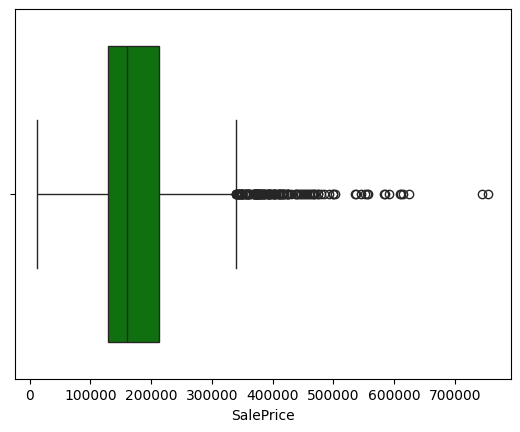

[160000 160000]
1465 1461
Q1: 129500.0
Q2: 160000.0
Q3: 213500.0
min:12789
max: 755000
(2926, 71)


In [12]:
# discretization of the target variable 
Y = localCopy.iloc[:, 70]

infos = {}
infos['mean'] = np.mean(np.array(Y))
infos['median'] = np.median(np.array(Y))
infos['max'] = np.max(np.array(Y))
infos['min'] = np.min(np.array(Y))
print(f"Information of the target variable: \n{infos}")

sbs.boxplot(x=Y, vert=False, color='green')
plt.show()

# compute the quartiles 
# step 1: copy/sort the data
Y_copy = Y.copy(deep=True).sort_values(ascending=True)
length = len(Y_copy)
# a ranges vector that defines the classes: e.g. for the class 1 we must look up to be between the 
# ranges[0] and ranges[1] => for each class 'i' the range is defined by (ranges[i-1], ranges[i])
ranges = [infos['min'], -1, -1, -1, infos['max']]

# length is even then:
# Q2 = mean(length/2, length/2-1)
Q2 = np.mean(np.array(Y_copy.iloc[(length//2)-1:length//2+1]))
print(np.array(Y_copy.iloc[(length//2)-1:length//2+1]))
# split the Series and compute the Q1, Q3
cond = Y_copy <= Q2
half1, half2 = Y_copy[cond], Y_copy[~cond]
print(len(half1), len(half2))
Q1 = np.median(np.array(half1))
Q3 = np.median(np.array(half2))
print(f"Q1: {Q1}\nQ2: {Q2}\nQ3: {Q3}\nmin:{infos['min']}\nmax: {infos['max']}") 
ranges[1] = Q1
ranges[2] = Q2 
ranges[3] = Q3

# change the target varaible to a categorical format
classes = ["cheap", "affordable", "expensive", "billionaire type of shit"]
cat_y: list[str] = []
for y in Y:
    if y <= ranges[1]:
        cat_y.append(classes[0])
    elif y <= ranges[2]:
        cat_y.append(classes[1])
    elif y <= ranges[3]:
        cat_y.append(classes[2])
    else:
        cat_y.append(classes[3])

print(localCopy.shape)
X = localCopy.iloc[:, :77]
Y = pd.Series(cat_y)


In [13]:
# Label encoding of the ordinal features
import math

# finding all the categories per each feature to be able to encode them 
# find them dynamically so in case of a dataset change the code adapts itself
ords = {}
ords_cols = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Sale Type']
for col in ords_cols:
    categories_withNaN = set(X[col])
    categories_withoutNaN = set(x for x in X[col] if not (isinstance(x, float) and math.isnan(x)))
    if len(categories_withoutNaN) != len(categories_withNaN):
        ords[col] = [*categories_withoutNaN, np.nan]
    else:
        ords[col] = [*categories_withoutNaN]
print(ords)

from sklearn.preprocessing import OrdinalEncoder

# for the record to see if we have NaN values so we could handle it
for col in list(ords.keys()):
    print(f"{col}: {X[col].isna().sum()}")


# Printing the set of the categories and their encoded relatives
for col, ordering in ords.items():
    enc = OrdinalEncoder(categories=[ordering], encoded_missing_value=-1)
    X[col] = enc.fit_transform(X[[col]])
    print(f"{set(X[col])}\n{ordering}\n\n")


enc = OrdinalEncoder(categories=[classes])

Y = enc.fit_transform(pd.DataFrame(Y))
Y = pd.DataFrame(Y)
Y


{'Exter Qual': ['Fa', 'TA', 'Ex', 'Gd'], 'Exter Cond': ['Fa', 'TA', 'Gd', 'Po', 'Ex'], 'Bsmt Qual': ['Fa', 'TA', 'Gd', 'Po', 'Ex', nan], 'Bsmt Cond': ['Fa', 'TA', 'Gd', 'Po', 'Ex', nan], 'Bsmt Exposure': ['Gd', 'Mn', 'Av', 'No', nan], 'BsmtFin Type 1': ['GLQ', 'ALQ', 'Rec', 'LwQ', 'BLQ', 'Unf', nan], 'BsmtFin Type 2': ['GLQ', 'ALQ', 'Rec', 'LwQ', 'BLQ', 'Unf', nan], 'Heating QC': ['Fa', 'TA', 'Gd', 'Po', 'Ex'], 'Kitchen Qual': ['Fa', 'TA', 'Gd', 'Po', 'Ex'], 'Functional': ['Sal', 'Maj1', 'Sev', 'Maj2', 'Min1', 'Min2', 'Typ', 'Mod'], 'Fireplace Qu': ['Fa', 'TA', 'Gd', 'Po', 'Ex', nan], 'Garage Finish': ['Fin', 'RFn', 'Unf', nan], 'Garage Qual': ['Fa', 'TA', 'Gd', 'Po', 'Ex', nan], 'Garage Cond': ['Fa', 'TA', 'Gd', 'Po', 'Ex', nan], 'Sale Type': ['CWD', 'ConLI', 'Con', 'ConLD', 'New', 'Oth', 'ConLw', 'WD ', 'COD', 'VWD']}
Exter Qual: 0
Exter Cond: 0
Bsmt Qual: 78
Bsmt Cond: 78
Bsmt Exposure: 81
BsmtFin Type 1: 78
BsmtFin Type 2: 79
Heating QC: 0
Kitchen Qual: 0
Functional: 0
Fireplace Qu

,0
0,3.0
1,0.0
2,2.0
3,3.0
4,2.0
...,...
2921,1.0
2922,1.0
2923,1.0
2924,2.0


In [14]:
# One-Hot Encoding for the rest of the categorical variables
from sklearn.preprocessing import OneHotEncoder

unencoded_cols = X.select_dtypes(include=['object']).columns.tolist()
enc = OneHotEncoder(sparse_output=False)
oneh_encoded = enc.fit_transform(X[unencoded_cols])
oneh_df = pd.DataFrame(oneh_encoded, columns=enc.get_feature_names_out(unencoded_cols))
X = pd.concat([X, oneh_df], axis=1)
X = X.drop(unencoded_cols, axis=1)
X.drop([1341,1497,1577, 2236], axis=0, inplace=True)
# check if there are any categorical columns
X.select_dtypes(include=['object']).columns.tolist()

[]

In [15]:
Y

,0
0,3.0
1,0.0
2,2.0
3,3.0
4,2.0
...,...
2921,1.0
2922,1.0
2923,1.0
2924,2.0


In [16]:
# XGBoost 
import xgboost as xgb
from xgboost import XGBClassifier


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = XGBClassifier(
    num_class=len(set(Y)), 
    eval_metric='mlogloss',
    max_depth=4,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

model.fit(X_train, Y_train)


X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.1, random_state=42)

model2 = XGBClassifier(
    num_class=len(set(Y)), 
    eval_metric='mlogloss',
    max_depth=4,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

model2.fit(X_train2, Y_train2)

# predicting 
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test2)
print(f" Accuracy of prediction: {f1_score(Y_test, y_pred, average="weighted")}")
print(f" Accuracy of prediction: {f1_score(Y_test2, y_pred2, average="weighted")}")
print(f" Accuracy of prediction: {recall_score(Y_test, y_pred, average="weighted")}")
print(f" Accuracy of prediction: {recall_score(Y_test2, y_pred2, average="weighted")}")





 Accuracy of prediction: 0.998293392714679
 Accuracy of prediction: 0.9897854396102101
 Accuracy of prediction: 0.9982935153583617
 Accuracy of prediction: 0.9897610921501706


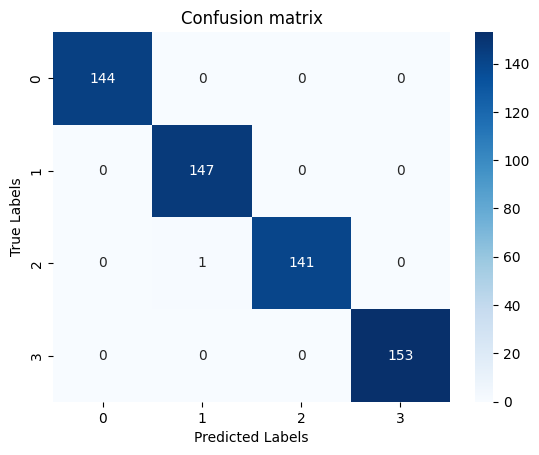

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
sbs.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix')
plt.show()
